## Dilation to resample binary volume  

In [1]:
from porespy import generators
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis as NA
import time

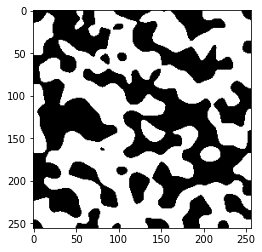

In [2]:
vol_shape = (256, 256, 256)
vol = generators.blobs(vol_shape)
plt.imshow(vol[vol.shape[0]//2,...], cmap = 'gray')

In [3]:
s = slice(None,None,4)
volb = vol[s,s,s].copy()

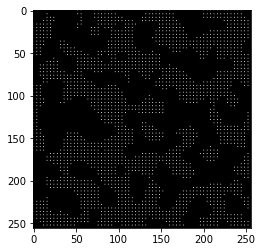

In [4]:
volbr = np.zeros(vol_shape)
volbr[s,s,s] = volb.copy()
plt.imshow(volbr.take(volbr.shape[0]//2, axis = 0), cmap = 'gray')

In [5]:
from tensorflow.keras.layers import UpSampling3D

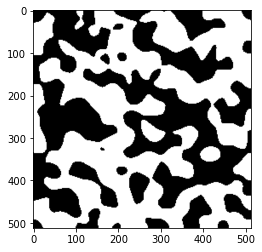

In [6]:
volbr = UpSampling3D(size=2)(vol[NA,...,NA])[0,...,0].numpy()
plt.imshow(volbr.take(volbr.shape[0]//2, axis = 0), cmap = 'gray')

In [22]:
n = 100
binning = 4
vols_binned = np.asarray([volb]*n)
vols_binned = vols_binned[...,np.newaxis]

In [23]:
n_vals = np.arange(1,2000,100)
times = []
for n in n_vals:
    vols_binned = np.asarray([volb]*n)
    vols_binned = vols_binned[...,np.newaxis]    
    t0 = time.time()
    volbr = UpSampling3D(size=binning)(vols_binned)[0,...,0].numpy()
    t1 = time.time()
    times.append(t1-t0)

Text(0, 0.5, 'time (seconds)')

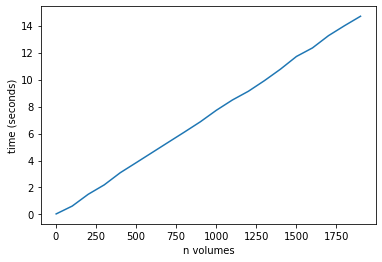

In [24]:
plt.plot(n_vals, times)
plt.xlabel('n volumes')
plt.ylabel('time (seconds)')

In [25]:
volbr.shape

(256, 256, 256)